In [1]:
import pandas as pd

Reading dataset

In [2]:
a = pd.read_csv("RAW_interactions.csv")
b = pd.read_csv("RAW_recipes.csv")

In [3]:
a.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [4]:
b.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [5]:
a.shape , b.shape

((1132367, 5), (231637, 12))

### Well thats a pretty big dataset so ,we are going take sampling

In [6]:
a = a.sample(50000)
b = b.sample(50000)

In [7]:
data = pd.merge(a,b, right_on='id',left_on='recipe_id')

In [8]:
data.head(2)

,user_id,recipe_id,date,rating,review,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,249867,238877,2009-03-26,5,"I love this lasagna recipe! Easy to follow, u...",easy lasagne,238877,90,531211,2007-07-05,"['time-to-make', 'course', 'main-ingredient', ...","[686.5, 47.0, 56.0, 67.0, 91.0, 70.0, 17.0]",8,"['preheat oven to 350f', 'brown meat', 'add sa...",it is easier to do the lasagna layers with the...,"['ground beef', 'spaghetti sauce', 'water', 'c...",10
1,175027,24629,2004-11-21,1,i didnt like the way that this thing tasted.. ...,anything goes stir fry,24629,45,26278,2002-04-08,"['60-minutes-or-less', 'time-to-make', 'course...","[15.6, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]",11,"['heat oil and add garlic and ginger', 'cook h...",garlic and ginger give this real zip. use anyt...,"['canola oil', 'ginger', 'garlic', 'carrot', '...",14


In [9]:
data.shape

(11036, 17)

Lets just Drop all the columns ,which dosent contribute to the model 

In [10]:
data.drop(["user_id","submitted","contributor_id","id"],axis=1,inplace=True)

In [11]:
data.describe()

,recipe_id,rating,minutes,n_steps,n_ingredients
count,11036.000000,11036.000000,11036.000000,11036.000000,11036.000000
mean,158897.411925,4.393440,128.379848,9.750272,8.999094
std,132347.284633,1.269691,1920.590391,5.813736,3.664968
min,59.000000,0.000000,0.000000,1.000000,1.000000
25%,49388.000000,4.000000,23.000000,6.000000,6.000000
50%,116282.500000,5.000000,40.000000,9.000000,9.000000
75%,243408.750000,5.000000,70.000000,12.000000,11.000000
max,536474.000000,5.000000,167040.000000,86.000000,28.000000


In [12]:
##This line takes a column named 'nutrition' in the DataFrame 'data' and uses the .str.split() method to split its values based on commas (,). 
##The expand=True parameter tells Pandas to expand the result into separate columns.
data[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] = data.nutrition.str.split(",",expand=True) 

In [13]:
##This line is applied to the 'calories' column. It uses the .apply() method to apply a function to each element in the 'calories' column.
##The lambda function (lambda x: x.replace("[" ,"")) is used to replace any square brackets [ with an empty string "". 
##This is likely done to remove any opening square brackets from the 'calories' values.
data['calories'] = data['calories'].apply(lambda x: x.replace("[" ,""))
data['carbohydrates'] = data['carbohydrates'].apply(lambda x: x.replace("]" ,""))

In [14]:
##This line is used to change the data type of the columns 'calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', and 'carbohydrates' 
##to floating-point numbers (float).
data[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] =  data[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']].astype(float)

 this code creates a single figure with two subplots side by side. The left subplot displays a distribution plot for the "minutes" column, and the right subplot displays a distribution plot for the "n_steps" column.

## EDA

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='n_steps', ylabel='Density'>

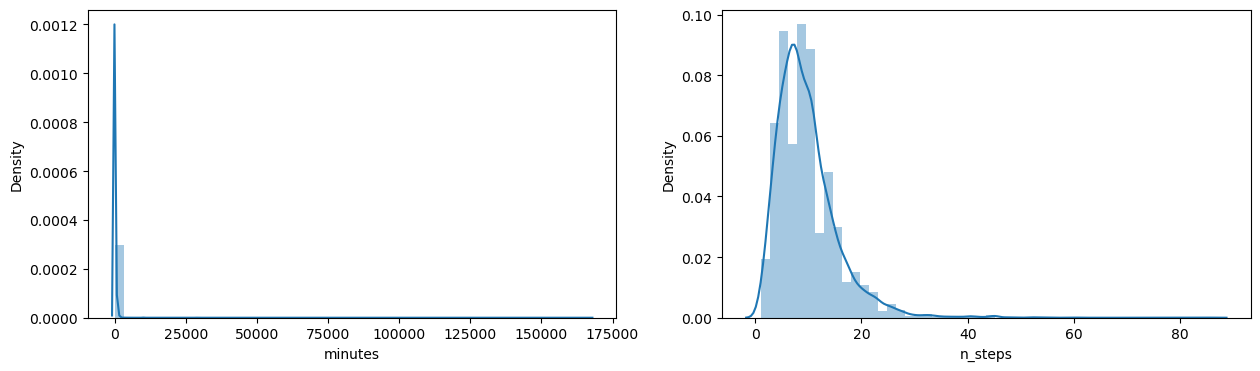

In [16]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.distplot(data["minutes"],ax=ax[0])
sns.distplot(data["n_steps"],ax=ax[1])

Box plots are useful for visualizing the distribution of data, particularly with respect to its spread, median, and any potential outliers

<AxesSubplot:>

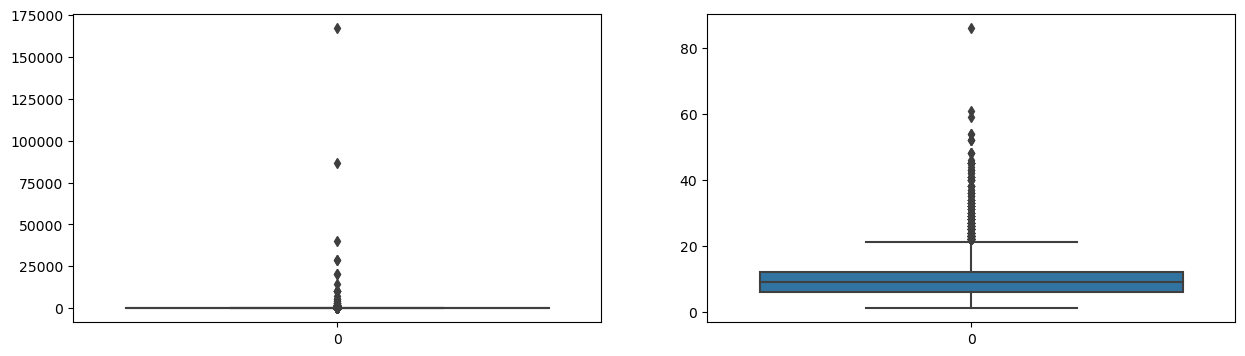

In [17]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.boxplot(data=data["minutes"],ax=ax[0])
sns.boxplot(data=data["n_steps"],ax=ax[1])

In [18]:
import numpy as np

It is a common approach to detect and remove outliers from a dataset, particularly when you suspect that the data may have extreme values. The IQR method is one way to identify and remove data points that fall significantly outside the central distribution of the data. 

In [19]:
q1 = np.percentile(data["minutes"],25)
q3 = np.percentile(data["minutes"],75)
IQR = q3- q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR

data = data.drop((data[data["minutes"]>=upper].index | data[data["minutes"]<=lower].index),axis=0)

1. data[data["minutes"] >= upper].index selects the indices of rows where "minutes" is above the upper threshold.
2. data[data["minutes"] <= lower].index selects the indices of rows where "minutes" is below the lower threshold.
3. The | operator is used to combine the two sets of indices (rows) that are considered potential outliers.
4. The data.drop(...) method is then used to remove those rows from the DataFrame, effectively eliminating potential outliers based on the IQR method.

In [20]:
q1 = np.percentile(data["n_steps"],25)
q3 = np.percentile(data["n_steps"],75)
IQR = q3- q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR

data = data.drop((data[data["n_steps"]>=upper].index | data[data["n_steps"]<=lower].index),axis=0)

<AxesSubplot:>

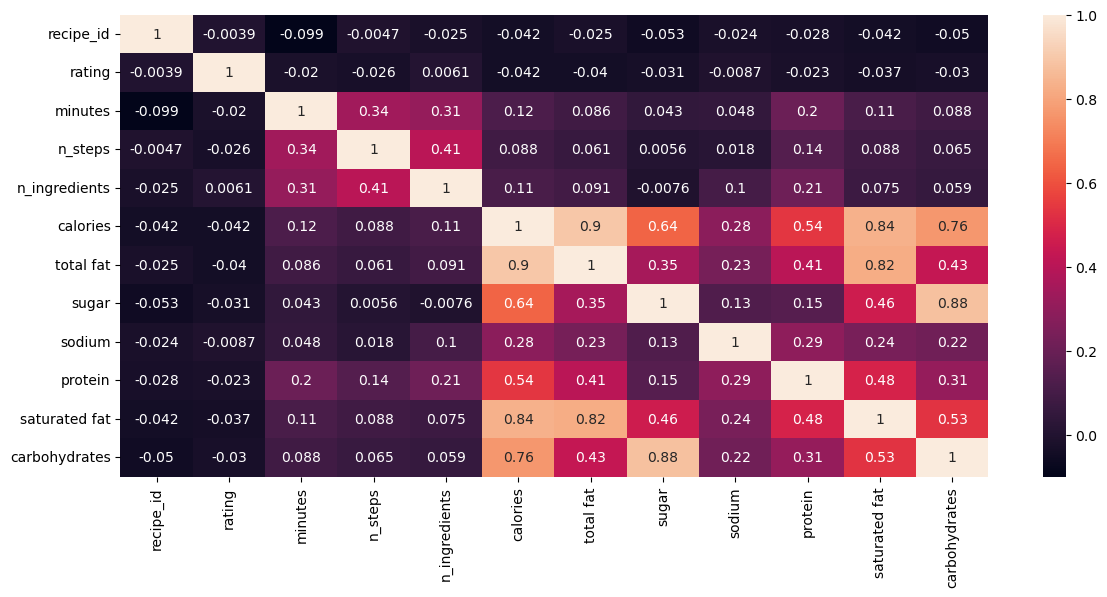

In [21]:
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),annot=True)

annot=True adds numerical annotations to the cells of the heatmap. These annotations display the actual correlation values, making it easier to interpret the heatmap.

<AxesSubplot:xlabel='n_ingredients', ylabel='minutes'>

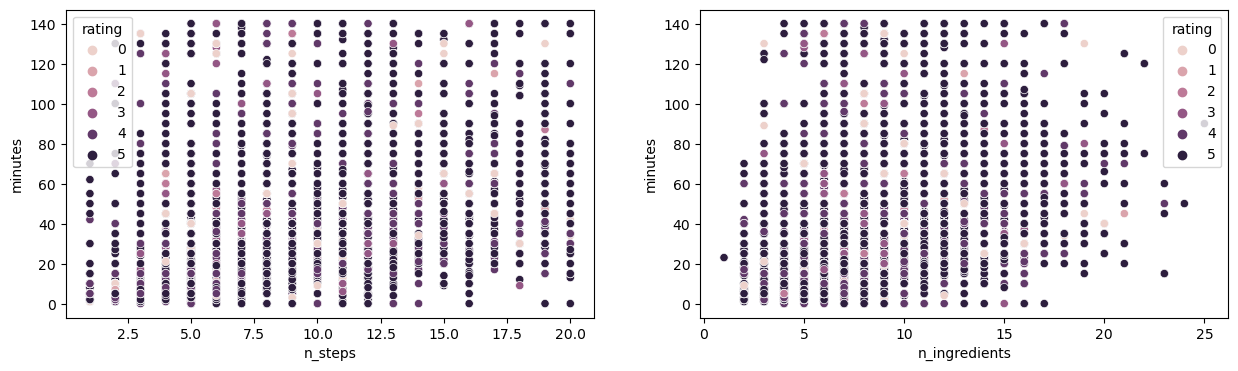

In [22]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.scatterplot(data=data,x="n_steps",y="minutes" ,hue="rating",ax=ax[0])
sns.scatterplot(data=data,x="n_ingredients",y="minutes" ,hue="rating",ax=ax[1])

The resulting figure will display two scatter plots side by side. These scatter plots allow you to explore the relationships between pairs of variables. In this case, you can visually assess how "n_steps" and "n_ingredients" are related to "minutes," and how the "rating" is encoded by color.



<AxesSubplot:xlabel='carbohydrates', ylabel='sugar'>

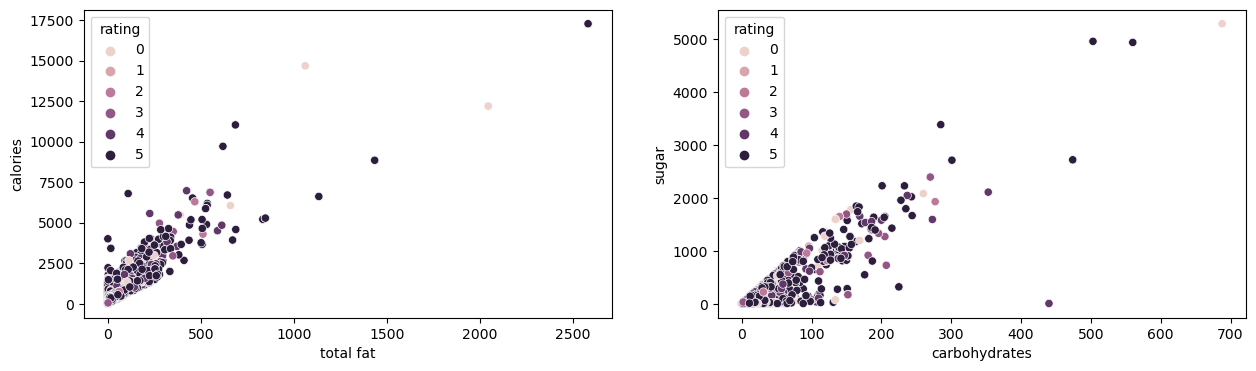

In [23]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.scatterplot(data=data,x="total fat",y="calories" ,hue="rating",ax=ax[0])
sns.scatterplot(data=data,x="carbohydrates",y="sugar" ,hue="rating",ax=ax[1])

In [24]:
data.isnull().sum()
data.dropna(inplace=True)

define a function ingredient_check and then applies this function to a DataFrame column to determine if a recipe contains non-vegetarian ingredients

In [25]:
from ast import literal_eval 
nonveg_ingred = ["egg","egg whites",]
def ingredient_check(data):
    veg = 0 
    for a in literal_eval(data):
        if a in nonveg_ingred:
            veg = 1
        else:
            veg = 0
    return veg
data["non veg"] = data["ingredients"].apply(ingredient_check)

Inside the ingredient_check function:

veg = 0 initializes a variable veg to 0. This variable is used to track whether the recipe is vegetarian (0) or non-vegetarian (1).

In [26]:
data.columns

Index(['recipe_id', 'date', 'rating', 'review', 'name', 'minutes', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients', 'calories', 'total fat', 'sugar', 'sodium', 'protein',
       'saturated fat', 'carbohydrates', 'non veg'],
      dtype='object')

In [27]:
data["non veg"].value_counts()

0    9199
1      83
Name: non veg, dtype: int64

In [28]:
rec = data[["recipe_id","rating","name","tags","description","ingredients",]]

In [29]:
rate = rec.groupby("name")["rating"].sum().reset_index()

In [30]:
import nltk

In [31]:
rec.duplicated().sum()
rec.drop_duplicates(inplace=True)

In [32]:
rec.reset_index(drop=True,inplace=True)

In [33]:
rec.head(2)

,recipe_id,rating,name,tags,description,ingredients
0,238877,5,easy lasagne,"['time-to-make', 'course', 'main-ingredient', ...",it is easier to do the lasagna layers with the...,"['ground beef', 'spaghetti sauce', 'water', 'c..."
1,24629,1,anything goes stir fry,"['60-minutes-or-less', 'time-to-make', 'course...",garlic and ginger give this real zip. use anyt...,"['canola oil', 'ginger', 'garlic', 'carrot', '..."


In [34]:
import string

def convert_to_list(data):
    a = data.replace("-","").replace("[","").replace("]","")
#     a = ''.join([i for i in a if not i.isdigit()])
    a = a.translate(str.maketrans('', '', string.punctuation))
    return a

In [35]:
rec["tags"] = rec["tags"].apply(lambda x: convert_to_list(x))
rec["ingredients"] = rec["ingredients"].apply(lambda x: convert_to_list(x))
rec["description"] = rec["description"].apply(lambda x: convert_to_list(x))

In [36]:
rec["rec"] = rec["tags"] + rec["description"] + rec["ingredients"]
rec = rec[~rec.duplicated("name")]
rec.reset_index(drop=True,inplace=True)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [38]:
# Initialize the TF-IDF vectorizer
cv = TfidfVectorizer()

In [39]:
rec_tfidf = cv.fit_transform(rec["rec"])
rec_cosine_sim = linear_kernel(rec_tfidf, rec_tfidf)
recipe_indices = pd.Series(rec.index, index=rec['name'])

Follow these Instructions after running the next block of code
- Enter the name of the dish (even part of the name is enough eg:salad)
- If you want more recommendations enter(next) the model will give you 5 more recommendations
- If you are done with the simulation enter -> exit and again enter -> exit to stop simulation

In [40]:
# Initialize the start_index variable outside the loop
start_index = 0

def recommend_similar_recipes(user_input, num_recommendations=5, start_index=0):
    matching_recipes = [recipe for recipe in recipe_indices.index if user_input.lower() in recipe.lower()]
    
    if not matching_recipes:
        return "No matching recipes found. Please try a different search term."

    recommendations = []
    
    for recipe_name in matching_recipes:
        recipe_index = recipe_indices[recipe_name]
        sim_scores = list(enumerate(rec_cosine_sim[recipe_index]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        similar_recipes = [rec.iloc[i] for i, _ in sim_scores[start_index:start_index + num_recommendations]]
        recommendations.extend(similar_recipes)
    
    return recommendations

def display_recipe_details(recipe):
    print(f"Name: {recipe['name'].values[0]}")
    print(f"Description: {recipe['description'].values[0]}")
    print(f"Rating: {recipe['rating'].values[0]}")
    print(f"Ingredients: {recipe['ingredients'].values[0]}")
    print(f"Recipe: {recipe['rec'].values[0]}\n")


def show_recipe_details(recipe_name):
    selected_recipe = rec[rec['name'] == recipe_name]
    if not selected_recipe.empty:
        display_recipe_details(selected_recipe)
    else:
        print("Recipe not found. Please try a different recipe name.")
# User interaction
while True:
    user_input = input("Enter a recipe name or type 'exit' to quit: ")
    
    if user_input.lower() == 'exit':
        break
    else:
        while True:
            recommendations = recommend_similar_recipes(user_input, start_index=start_index)
            if isinstance(recommendations, str):
                print(recommendations)
                break
            else:
                print(f"Top {start_index + 5} similar recipes:")
                for i, recipe in enumerate(recommendations[start_index:start_index + 5]):
                    print(f"{i + 1}. {recipe['name']}")
                
                option = input(" type 'next' to see the next 5 (or 'exit' to go back): ")
                if option == 'next':
                    start_index += 5
                elif option == 'exit':
                    break
                else:
                    print("Invalid input. Returning to the menu.")

Top 5 similar recipes:
1. cran orange spinach salad
2. creamy spinach salad
3. fruited spinach salad
4. cool n creamy fruit salad
5. piggy cake
Top 10 similar recipes:
1. pecan crusted chicken tenders over salad
2. paula deen s crab cakes with lemon dill sauce
3. tomato  lettuce and olive salad tossed with parsley vinaigrette
4. caprese salad insalata caprese
5. crudits with vodka lemon cream cheese


Want to know more about the Name that caught your Eye? Enter the name from recommendations inside the double Quotes

In [41]:
show_recipe_details("crudits with vodka lemon cream cheese")

Name: crudits with vodka lemon cream cheese
Description: 350 best vegan recipes
Rating: 4
Ingredients: vegan cream cheese vodka lemon juice fresh dill salt cucumber radishes celery belgian endive fresh chives
Recipe: 15minutesorless timetomake course mainingredient preparation snacks vegetables easy 3stepsorless350 best vegan recipesvegan cream cheese vodka lemon juice fresh dill salt cucumber radishes celery belgian endive fresh chives

